## Importing Modules

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split 
from __future__ import division
from sklearn.preprocessing import Imputer
from sklearn.naive_bayes import GaussianNB

## Read the dataset 

In [3]:
df = pd.read_csv('/home/emu/JupyterNotebook/FirstTry/pima-data.csv')
del df['skin']
df['diabetes'] = df['diabetes'].map({True: 1, False: 0})
df.head(1)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1


## Data Spilting

In [4]:
feature_column_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_name = ['diabetes']
X = df[feature_column_names].values
Y = df[predicted_class_name].values
split_test_size = 0.30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=split_test_size, random_state=42)

## Check data for null values

In [5]:
print "#rows in dataframe {0}".format(len(df))
print "#data missing in glucose_conc {0}".format(len(df.loc[df['glucose_conc'] == 0]))
print "#data missing in diastolic_bp {0}".format(len(df.loc[df['diastolic_bp'] == 0]))
print "#data missing in thickness {0}".format(len(df.loc[df['thickness'] == 0]))
print "#data missing in insulin {0}".format(len(df.loc[df['insulin'] == 0]))
print "#data missing in bmi {0}".format(len(df.loc[df['bmi'] == 0]))
print "#data missing in diab_pred {0}".format(len(df.loc[df['diab_pred'] == 0]))
print "#data missing in age {0}".format(len(df.loc[df['age'] == 0]))

#rows in dataframe 768
#data missing in glucose_conc 5
#data missing in diastolic_bp 35
#data missing in thickness 227
#data missing in insulin 374
#data missing in bmi 11
#data missing in diab_pred 0
#data missing in age 0


## Imputation 

In [6]:
fill_0 = Imputer(missing_values=0, strategy='mean', axis=0)
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

## Data Training

In [7]:
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train.ravel())

GaussianNB()

## Prediction

In [8]:
prediction_from_trained_data = nb_model.predict(X_train)

## Accuracy 

In [9]:
from sklearn import metrics

accuracy = metrics.accuracy_score(Y_train, prediction_from_trained_data)

print "Accuracy in train data of our naive bayes model is : {0:.4f}".format(accuracy)

# accuracy on testing data
prediction_from_test_data = nb_model.predict(X_test)

accuracy = metrics.accuracy_score(Y_test, prediction_from_test_data)

print "Accuracy in test data of our naive bayes model is : {0:.4f}".format(accuracy)

Accuracy in train data of our naive bayes model is : 0.7542
Accuracy in test data of our naive bayes model is : 0.7359


## Confusion Matrix

In [10]:
print "Confusion Matrix"

print "{0}".format(metrics.confusion_matrix(Y_test, prediction_from_test_data, labels=[
1, 0]))

Confusion Matrix
[[ 52  28]
 [ 33 118]]


## Classification Report

In [11]:
print "{0}".format(metrics.classification_report(Y_test, prediction_from_test_data, labels=[
1, 0]))

             precision    recall  f1-score   support

          1       0.61      0.65      0.63        80
          0       0.81      0.78      0.79       151

avg / total       0.74      0.74      0.74       231



## Changed Algorithm: Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [13]:
rf_prediction_from_trained_data = rf_model.predict(X_train)

accuracy = metrics.accuracy_score(Y_train, rf_prediction_from_trained_data)

print "Accuracy in train data of our Random Forest model is : {0:.4f}".format(accuracy)

# accuracy on testing data
rf_prediction_from_test_data = rf_model.predict(X_test)

accuracy = metrics.accuracy_score(Y_test, rf_prediction_from_test_data)

print "Accuracy in test data of our Random Forest model is : {0:.4f}".format(accuracy)

print "{0}".format(metrics.classification_report(Y_test, rf_prediction_from_test_data, labels=[
1, 0]))

Accuracy in train data of our Random Forest model is : 0.9870
Accuracy in test data of our Random Forest model is : 0.7100
             precision    recall  f1-score   support

          1       0.59      0.54      0.56        80
          0       0.77      0.80      0.78       151

avg / total       0.70      0.71      0.71       231



## LogisticRegression

In [17]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42)
lr_model.fit(X_train, Y_train.ravel())


# accuracy on testing data
lr_prediction_from_test_data = lr_model.predict(X_test)

accuracy = metrics.accuracy_score(Y_test, lr_prediction_from_test_data)

print "Accuracy in test data of our LogisticRegression model is : {0:.4f}".format(accuracy)

print "{0}".format(metrics.classification_report(Y_test, lr_prediction_from_test_data, labels=[
1, 0]))

Accuracy in test data of our LogisticRegression model is : 0.7446
             precision    recall  f1-score   support

          1       0.66      0.55      0.60        80
          0       0.78      0.85      0.81       151

avg / total       0.74      0.74      0.74       231



## Regularization Hyperparameter

1st max value of 0.738 occured at C=0.300


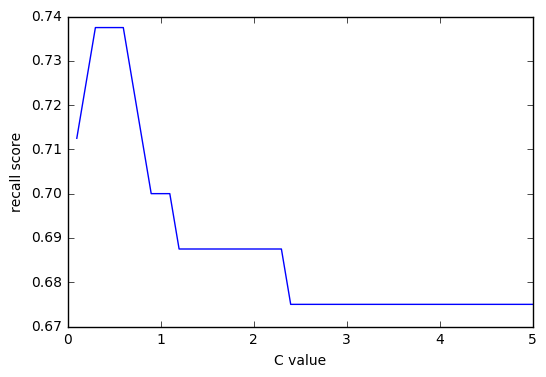

In [26]:
C_start = 0.1
C_increment = 0.1
C_end = 5

C_values, recall_scores = [], []
C_val = C_start
best_recall_score = 0
while(C_val < C_end):
    C_values.append(C_val)
    
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42)
    lr_model_loop.fit(X_train, Y_train.ravel())

    lr_prediction_from_test_data = lr_model_loop.predict(X_test)
    
    recall_score = metrics.recall_score(Y_test, lr_prediction_from_test_data)
    recall_scores.append(recall_score)
    
    if(best_recall_score < recall_score):
        best_recall_score = recall_score
    
    C_val += C_increment
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print "1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score,	best_score_C_val)
%matplotlib	inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")